In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix,roc_curve


In [3]:
X,y = load_breast_cancer(return_X_y=True)

In [4]:
X = X[:, [0, 1]] #for make prediction little worse

In [5]:
print(X.shape)  
print(y.shape) 


(569, 2)
(569,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [7]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=100))
])


In [8]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [9]:
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Accuracy: 0.9035087719298246
ROC-AUC: 0.9731411726170979
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



In [11]:
print(confusion_matrix(y_test, y_pred))

[[36  7]
 [ 4 67]]


In [12]:
# FOR ROC-CURVE

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


In [14]:
tpr

array([0.        , 0.01408451, 0.73239437, 0.73239437, 0.8028169 ,
       0.8028169 , 0.83098592, 0.83098592, 0.87323944, 0.87323944,
       0.91549296, 0.91549296, 0.94366197, 0.94366197, 0.95774648,
       0.95774648, 0.97183099, 0.97183099, 1.        , 1.        ])

In [15]:
fpr

array([0.        , 0.        , 0.        , 0.02325581, 0.02325581,
       0.04651163, 0.04651163, 0.06976744, 0.06976744, 0.09302326,
       0.09302326, 0.11627907, 0.11627907, 0.18604651, 0.18604651,
       0.23255814, 0.23255814, 0.27906977, 0.27906977, 1.        ])

In [16]:
thresholds

array([           inf, 9.99724047e-01, 8.52178893e-01, 8.46361977e-01,
       7.99945333e-01, 7.86181786e-01, 7.66194808e-01, 7.61023732e-01,
       7.37358232e-01, 7.18144295e-01, 6.02871712e-01, 5.92126535e-01,
       5.61137578e-01, 4.80566503e-01, 4.61856110e-01, 3.71667302e-01,
       3.23776983e-01, 2.50317969e-01, 2.33950073e-01, 3.56540364e-05])

In [17]:
youden_j = tpr - fpr
print(youden_j)
best_idx = np.argmax(youden_j)
print(best_idx)
best_threshold = thresholds[best_idx]



[0.         0.01408451 0.73239437 0.70913855 0.77956109 0.75630527
 0.78447429 0.76121847 0.80347199 0.78021618 0.8224697  0.79921389
 0.8273829  0.75761546 0.77169997 0.72518834 0.73927285 0.69276122
 0.72093023 0.        ]
12


In [18]:
print("Best threshold (ROC):", best_threshold)


Best threshold (ROC): 0.5611375781013732


In [19]:
y_pred_best = (y_prob >= best_threshold).astype(int)


In [44]:
y_prob >= best_threshold

array([ True, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False])

In [46]:
y_pred_best

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [20]:
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [21]:
print(confusion_matrix(y_test,y_pred_best))

[[38  5]
 [ 4 67]]


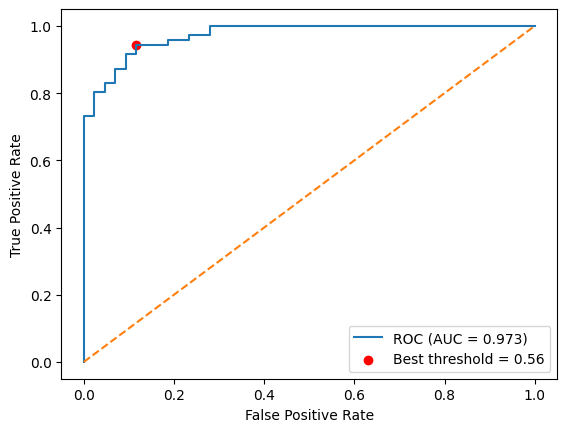

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.scatter(fpr[best_idx], tpr[best_idx], color='red',
            label=f"Best threshold = {best_threshold:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
